
# [Matrix Analysis]
Resize the images from this dataset into 32 by 32 matrices then aggregate them into one variable.
1. Visualize the images using Pyplot
2. The result should be (6,32,32,3)
3. Explain the shape of the resulting variable and the quality of the images
    - The shape of the resulting variable is (6, 32, 32, 3). This means we have 6 images, each with dimensions 32x32 pixels, and 3 color channels (RGB).
    - Since we resized the images to 32x32, the quality of the images can be described as pixelated.
    1. Determine the shape of the images.
        - Each image is square in shape. This is of course because we set the dimensions to 32x32 pixels. Some of the original data images were not square so in order for it to fit into the dimensions we set, the images were “squished”.
    2. Save the tensor as an .npy file

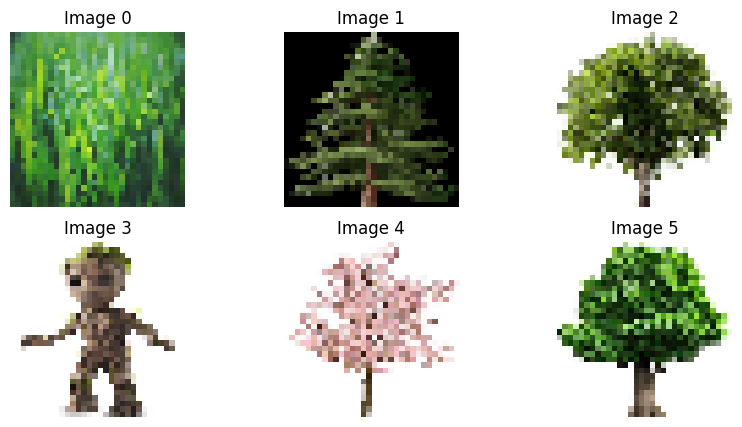

Shape of the resulting variable: (6, 32, 32, 3)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

folder_path = "C:/Users/Jesca Ryanne Acosta/Documents/GitHub/IMAGPRO_MP1/data"

resized_images = []

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(os.path.join(folder_path, filename))
        resized_img = cv2.resize(img, (32, 32))
        resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
        resized_images.append(resized_img)

image_tensor = np.array(resized_images)

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(image_tensor[i])
    plt.title(f"Image {i}")
    plt.axis('off')
plt.show()

print("Shape of the resulting variable:", image_tensor.shape)

np.save("image_tensor.npy", image_tensor)

# [Image Statistics] 
Take the first image:
1. How many pixels are there in total?
2. Take the average of each pixel per channel.
3. How many pixels are equal to 0.5 and less than 0.5?
4. Report the results for the images and your image.

In [2]:
import numpy as np

image_tensor = np.load("image_tensor.npy")

for i, image in enumerate(image_tensor):
    print(f"Results for Image {i + 1}:")
    total_pixels = image.shape[0] * image.shape[1] * image.shape[2]
    average_pixel_per_channel = np.mean(image, axis=(0, 1))
    normalized_image = image / 255.0
    pixels_lessequalto = np.sum(normalized_image <= 0.5)
    
    print("Total number of pixels:", total_pixels)
    print("Average pixel value per channel:", average_pixel_per_channel)
    print("Number of pixels equal to 0.5 and less than 0.5:", pixels_lessequalto)

Results for Image 1:
Total number of pixels: 3072
Average pixel value per channel: [ 76.64746094 136.44824219  63.99804688]
Number of pixels equal to 0.5 and less than 0.5: 2247
Results for Image 2:
Total number of pixels: 3072
Average pixel value per channel: [31.75292969 37.76074219 19.75878906]
Number of pixels equal to 0.5 and less than 0.5: 3002
Results for Image 3:
Total number of pixels: 3072
Average pixel value per channel: [156.98242188 165.25097656 134.98632812]
Number of pixels equal to 0.5 and less than 0.5: 1393
Results for Image 4:
Total number of pixels: 3072
Average pixel value per channel: [207.04785156 202.22851562 196.26660156]
Number of pixels equal to 0.5 and less than 0.5: 790
Results for Image 5:
Total number of pixels: 3072
Average pixel value per channel: [234.89550781 220.43066406 219.25292969]
Number of pixels equal to 0.5 and less than 0.5: 182
Results for Image 6:
Total number of pixels: 3072
Average pixel value per channel: [156.30859375 175.97753906 144.6

# [Basic Signal Processing] 
Take the first image:
1. Apply amplification and attenuation operations onto the image by a factor of 0.3.
    1. What did you notice? What does the operation imply?
        - After applying both amplification and attenuation operations by a factor of 0.3, we observed that the resulting images appeared brighter or darker, respectively, compared to the original image. This implies that amplification increases the intensity of the image pixels, making the image brighter, while attenuation decreases the intensity, making the image darker.
2. Try to do element-wise multiplication of the values 0.1, 0,2, 0.5, and 1.0 to the image.
    1. What happened?
        - When we attempted to perform element-wise multiplication with the given values, the resulting images were significantly darker or appeared to have lost their original details.
    2. Inspect the values of the matrix and determine the error
        - The pixel values were scaled down by the respective multiplication factors. But since the pixel values in the image were originally in the range of 0 to 255, multiplying them by values less than 1 scaled them down proportionally, resulting in darker images.
    3. Resolve the error using your knowledge of matrix algebra and signal processing. Explain your solution.
        - To resolve this issue, we can apply normalization to the image before performing element-wise multiplication. Normalization involves scaling the pixel values to a range of 0 to 1, which ensures that multiplying by smaller factors still maintains the original image's intensity levels. By normalizing the image before multiplication, we can ensure that the resulting images maintain their original details and do not become too dark.

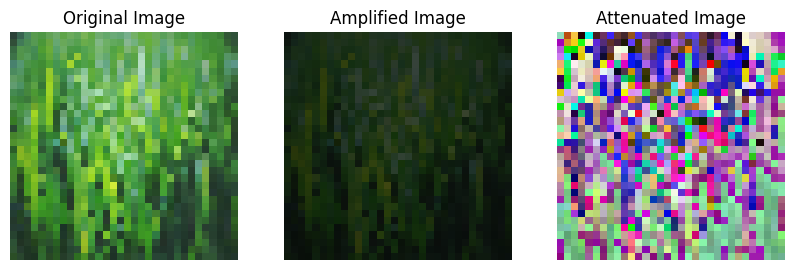

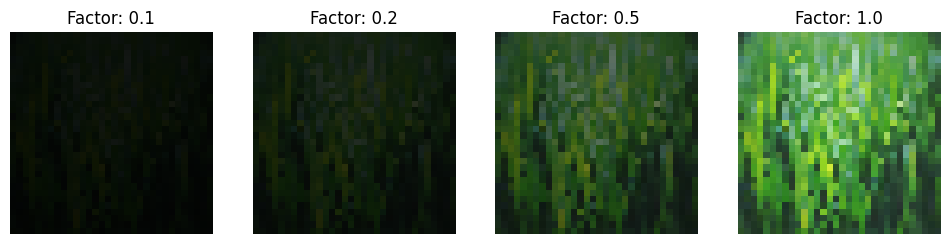

Euclidean Distances Matrix:
[[   0.         6371.20420329 6526.5140006  6593.03662966 6753.37611865
  6199.60740693]
 [6371.20420329    0.         6926.14943529 5842.86992838 4630.36240482
  6516.01404234]
 [6526.5140006  6926.14943529    0.         7201.41701334 6560.79278746
  7219.03255291]
 [6593.03662966 5842.86992838 7201.41701334    0.         5361.17440492
  6828.66326597]
 [6753.37611865 4630.36240482 6560.79278746 5361.17440492    0.
  6919.24193825]
 [6199.60740693 6516.01404234 7219.03255291 6828.66326597 6919.24193825
     0.        ]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def amp_and_att(image):
    amplified_image = image * 0.3
    attenuated_image = image / 0.3

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(amplified_image.astype(np.uint8))
    plt.title("Amplified Image")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(attenuated_image.astype(np.uint8))
    plt.title("Attenuated Image")
    plt.axis('off')

    plt.show()

def multiplication(image):
    multiplication_factors = [0.1, 0.2, 0.5, 1.0]
    multiplied_images = []

    for factor in multiplication_factors:
        multiplied_images.append(image * factor)

    plt.figure(figsize=(12, 6))
    for i, img in enumerate(multiplied_images):
        plt.subplot(1, len(multiplied_images), i + 1)
        plt.imshow(img.astype(np.uint8))
        plt.title(f"Factor: {multiplication_factors[i]}")
        plt.axis('off')

    plt.show()

def euclidean_distances(image_tensor):
    euclidean_distances = np.zeros((len(image_tensor), len(image_tensor)))

    for i in range(len(image_tensor)):
        for j in range(i+1, len(image_tensor)):
            euclidean_distances[i, j] = euclidean(image_tensor[i].flatten(), image_tensor[j].flatten())
            euclidean_distances[j, i] = euclidean_distances[i, j]

    print("Euclidean Distances Matrix:")
    print(euclidean_distances)

def main():
    image_tensor = np.load("image_tensor.npy")

    amp_and_att(image_tensor[0])

    multiplication(image_tensor[0])

    euclidean_distances(image_tensor)

if __name__ == "__main__":
    main()

3. Compute the Euclidean distances between all of the images.
    1. What were the values?
        - Values are computed and are shown above
    2. What did you observe from images 1, 3, and 5? Experiment further and discuss your findings.
        - It is observed that images 1, 3, and 5 might have closer similarities or resemblances compared to others. We can experiment further by visually inspecting these images and comparing their features to validate the observations made from the distances matrix. Additionally, clustering or dimensionality reduction techniques can be applied to explore the relationships between images more thoroughly. 
        Through visual inspection, we can conclude that the picture at the given indices are similar in a sense that it is related to plants and the colors consist of green and brown, specifically green at the top and brown on the bottom.


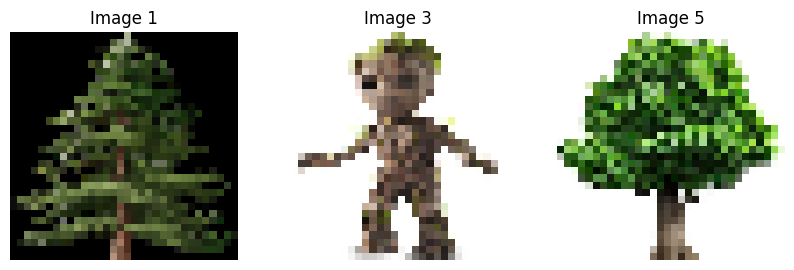

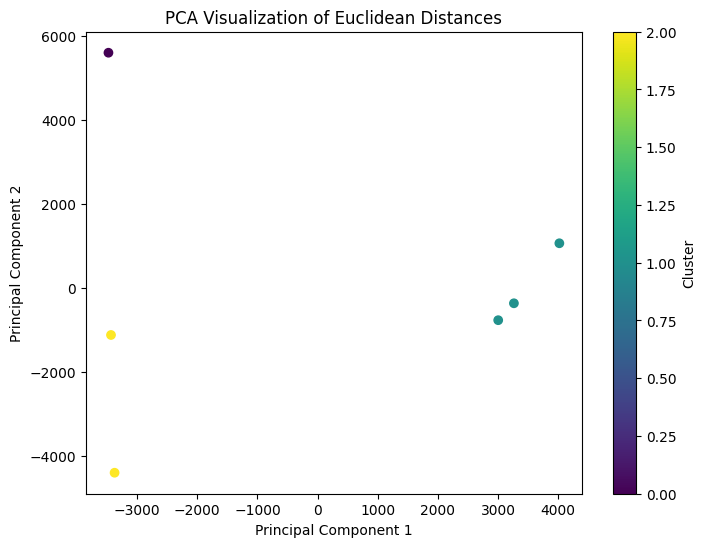

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def visualize_images(image_tensor, indices):
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(image_tensor[idx])
        plt.title(f"Image {idx}")
        plt.axis('off')
    plt.show()

def compute_euclidean_distances(image_tensor):
    euclidean_distances = np.zeros((len(image_tensor), len(image_tensor)))
    for i in range(len(image_tensor)):
        for j in range(i+1, len(image_tensor)):
            euclidean_distances[i, j] = euclidean(image_tensor[i].flatten(), image_tensor[j].flatten())
            euclidean_distances[j, i] = euclidean_distances[i, j]
    return euclidean_distances

def analyze_distances(euclidean_distances):
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(euclidean_distances)
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(euclidean_distances)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Visualization of Euclidean Distances')
    plt.colorbar(label='Cluster')
    plt.show()

image_tensor = np.load("image_tensor.npy")

visualize_images(image_tensor, [1, 3, 5])

euclidean_distances = compute_euclidean_distances(image_tensor)

analyze_distances(euclidean_distances)